# Enter State Farm

In [1]:
from fastai.conv_learner import *
from fastai.dataset import *
from fastai.transforms import*
# from torchsummary import summary

In [2]:
%matplotlib inline
from __future__ import print_function, division

# Validation and Sample are created with separate notebook
#path = "data/state/"
# path = "data/state/sample/"
# import utils; reload(utils)
# from utils import *
from IPython.display import FileLink

In [3]:
bs=64
sz=224

In [67]:
PATH = Path('data/state/sample')

## Custom Simple Conv

In [13]:
arch=vgg16

In [14]:
# class SimpleConvBN(nn.Module):
#     "convolutional layer then batchnorm"

#     def __init__(self, ch_in, ch_out, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)):
#         super().__init__()
#         self.conv = nn.Conv2d(ch_in, ch_out, kernel_size=kernel_size, stride=stride, padding=padding, bias=False)
#         self.bn = nn.BatchNorm2d(ch_out, momentum=0.01)
#         self.maxpool = nn.MaxPool2d(kernel_size=2)
#         self.relu = nn.ReLU(inplace=True)

#     def forward(self, x): return self.relu(self.bn(self.conv(x)))


In [15]:
# class Flatten(nn.Module):
#     def forward(self, input):
#         return input.view(input.size(0), -1)

In [16]:
# class SimpleConvNet(nn.Module):
    
#     def __init__(self,ch_in, ch_out, kernel_size=3, stride=2, padding=0):
#         super().__init__()
#         self.conv1 = SimpleConvBN(3,32)
#         self.conv2 = SimpleConvBN(32,64)
#         self.flatten = Flatten()
#         self.fc1 = nn.Linear(int(224*224*64/4/4),int(200))
#         self.relu1 = nn.ReLU(inplace=True)
#         self.bn1 = nn.BatchNorm2d(200)
#         self.fc2 = nn.Linear(200,ch_out)
#     def forward(self, x): 
#         x = self.conv1(x)
# #         x = self.conv2(x)
# #         x = self.flatten(x)
# #         x = self.fc1(x)
# #         x = self.relu1(x)
# #         x = self.fc2(x)
#         return x

In [70]:
data = ImageClassifierData.from_paths(PATH, bs=bs, tfms=tfms_from_model(arch, sz, max_zoom=1.1))

In [71]:
# learn = ConvLearner(data,BasicModel(to_gpu(model)))
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [55]:
learn.lr_find()


epoch      trn_loss   val_loss   accuracy                 
    0      3.627458   185.163142 0.183     


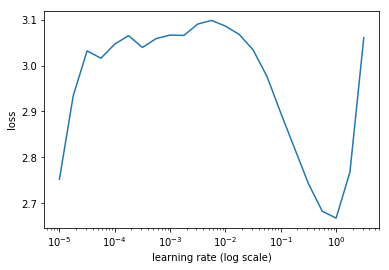

In [56]:
learn.sched.plot(0,0)

In [57]:
learn.lr_find()

epoch      trn_loss   val_loss   accuracy                
    0      4.120157   316.571581 0.177     


In [72]:
learn.fit(1e-2, 1, wds=0, cycle_len=10, use_clr_beta=(10,10,0.95,0.85))

epoch      trn_loss   val_loss   accuracy                 
    0      2.74892    2.244519   0.163     
    1      2.24689    1.928606   0.312                    
    2      1.763238   1.677199   0.433                    
    3      1.389872   1.578159   0.482                    
    4      1.112874   1.506161   0.504                    
    5      0.909077   1.472932   0.511                     
 21%|██        | 5/24 [00:00<00:01, 16.47it/s, loss=0.827]
    6      0.755478   1.435981   0.538                     
    7      0.646026   1.420675   0.535                     
    8      0.571348   1.439489   0.523                     
    9      0.515794   1.429334   0.532                     



[array([1.42933]), 0.532]

* Demonstration Transformation
* Choose Best Augmentation
* Submit StateFarm
* Plot some graph, figure out image size
* Start fabric dataset, or google
* Flask Web Server

In [73]:
learn.save('sample_pretrain')

In [74]:
ls $PATH/models

224_all.h5  224_lastlayer.h5  sample_pretain.h5  sample_pretrain.h5  tmp.h5


# Data Augmentation

So now the model overfit a lot, it is as expected as we are using a large model with only few sample data. Let's try some augmentation to mitigate the overfit problem'

## Basic Transformation

In [75]:
transforms = [RandomBlur(),RandomCrop(224),RandomDihedral(),RandomFlip(),
             RandomLighting(0.05, 0.05),RandomRotate(10),
            RandomScale(224,0.1),RandomStretch(0.1),RandomZoom(0.1)]

In [76]:
transforms_names =['RandomBlur()','RandomCrop(224)','RandomDihedral()','RandomFlip()',
             'RandomLighting(0.05, 0.05)','RandomRotate(10)',
            'RandomScale(224,0.1)','RandomStretch(0.1)','RandomZoom(0.1)']

In [77]:
len(transforms), len(transforms_names)

(9, 9)

 7      0.646026   1.420675   0.535                     
    8      0.571348   1.439489   0.523                     
    9      0.515794   1.429334   0.532   

In [79]:
results = []

for transform, transform_name in zip(transforms,transforms_names):    
    print('Transformation:', transform_name)
    data = ImageClassifierData.from_paths(PATH, bs=bs,
                                          tfms=tfms_from_model(arch, sz, aug_tfms=transform))
    learn = ConvLearner.pretrained(arch, data, precompute=True) # precompute=False to use augmented images
    learn.load('sample_pretrain')
    learn.precompute=False
    results.append(learn.fit(1e-2, 1, wds=0, cycle_len=3, use_clr_beta=(10,10,0.95,0.85)))

Transformation: RandomBlur()


epoch      trn_loss   val_loss   accuracy                  
    0      0.805283   1.408077   0.533     
    1      0.770869   1.386298   0.535                     
    2      0.713374   1.357215   0.553                     

Transformation: RandomCrop(224)


epoch      trn_loss   val_loss   accuracy                  
    0      0.785738   1.384689   0.545     
    1      0.750456   1.363406   0.557                     
    2      0.700444   1.334768   0.55                      

Transformation: RandomDihedral()


epoch      trn_loss   val_loss   accuracy                 
    0      2.377353   1.429313   0.51      
    1      2.08925    1.411633   0.529                    
    2      1.923287   1.44036    0.534                    

Transformation: RandomFlip()


epoch      trn_loss   val_loss   accuracy                 
    0      1.053364   1.352221   0.555     
    1      0.969047   1.278191   0.602                     
    2      0.894338   1.275105   0.596                     

Transformation: RandomLighting(0.05, 0.05)


epoch      trn_loss   val_loss   accuracy                  
    0      0.829801   1.377638   0.548     
    1      0.772559   1.284459   0.576                     
    2      0.724221   1.279427   0.576                     

Transformation: RandomRotate(10)


epoch      trn_loss   val_loss   accuracy                  
    0      0.99587    1.456038   0.514     
    1      0.969531   1.437958   0.527                     
    2      0.917512   1.423309   0.527                     

Transformation: RandomScale(224,0.1)


  0%|          | 0/24 [00:00<?, ?it/s]


ValueError: all input arrays must have the same shape

In [56]:
# pd.DataFrame([results], columns=transforms_names)

,RandomBlur(),RandomCrop(224),RandomDihedral(),RandomFlip(),"RandomLighting(0.05, 0.05)",RandomRotate(10),"RandomScale(224,0.1)",RandomStretch(0.1),RandomZoom(0.1)
0,"[[1.3233119201660157], 0.558]","[[1.3892761173248291], 0.522]","[[1.4639691848754883], 0.5139999997615814]","[[1.2716307106018065], 0.5890000004768372]","[[1.49022953414917], 0.5209999995231629]","[[1.357343373298645], 0.5469999995231628]","[[1.3781134195327758], 0.5480000002384185]","[[1.4077640571594239], 0.5109999998807907]","[[1.4239098224639892], 0.5309999995231628]"


Put together all augmentation that has significant improvement

In [ ]:
transforms_all = [RandomScale(224,0.1), RandomStretch(0.1), RandomRotate(10), RandomLighting(0.05, 0.05), RandomDihedral(),RandomBlur()

data = ImageClassifierData.from_paths(PATH, bs=bs, tfms=tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=0.1))

learn = ConvLearner.pretrained(arch, data, precompute=True)